In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')

<IPython.core.display.Javascript object>


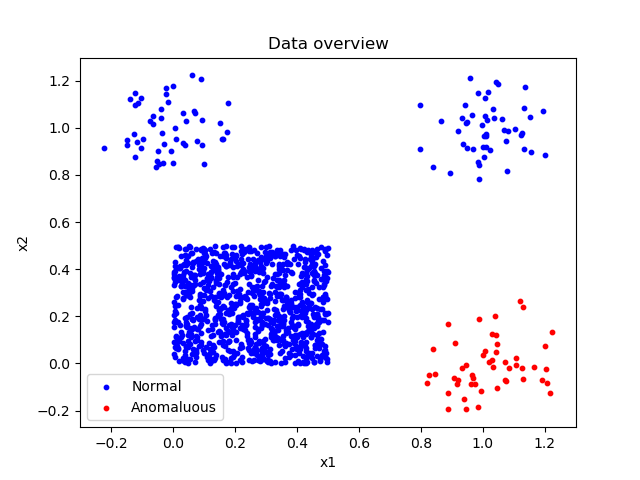

In [2]:
from coniferest.datasets import MalanchevDataset

dataset = MalanchevDataset(inliers=1000, outliers=50)

plt.figure()
plt.title('Data overview')
plt.scatter(*dataset.data[dataset.labels == 1, :].T, color='blue', s=10, label='Normal')
plt.scatter(*dataset.data[dataset.labels == -1, :].T, color='red', s=10, label='Anomaluous')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
pass

In [3]:
from coniferest.experiment import AnomalyDetectionExperiment

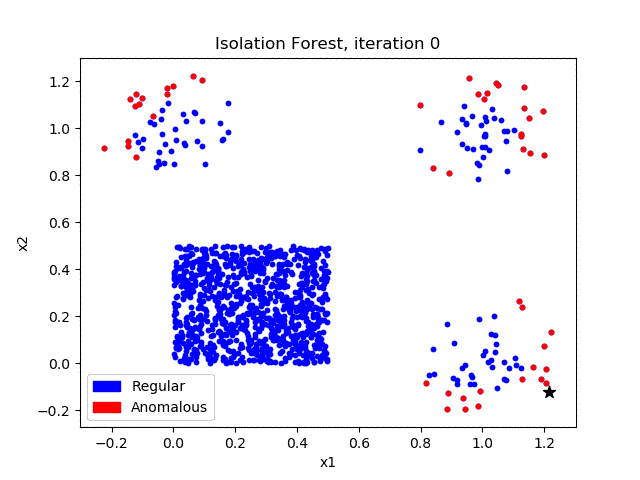

In [4]:
from coniferest.isoforest import IsolationForest, IsolationForestAnomalyDetector

isoforest = IsolationForest()
isoforest_det = IsolationForestAnomalyDetector(isoforest)
isoforest_exp = AnomalyDetectionExperiment(isoforest_det, dataset.data, dataset.labels)
isoforest_exp.display_cartoon()

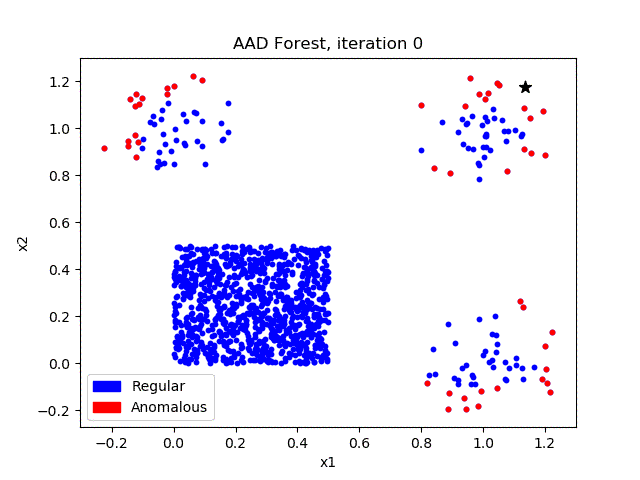

In [5]:
from coniferest.aadforest import AADForest, AADForestAnomalyDetector

aadforest = AADForest()
aadforest_det = AADForestAnomalyDetector(aadforest)
aadforest_exp = AnomalyDetectionExperiment(aadforest_det, dataset.data, dataset.labels)
aadforest_exp.display_cartoon()

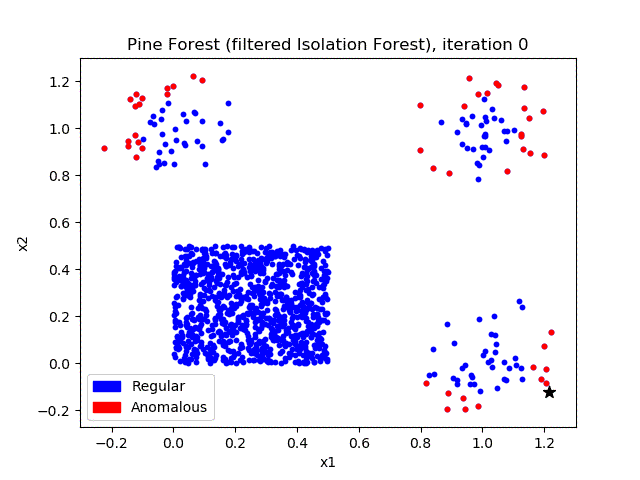

In [6]:
from coniferest.pineforest import PineForest, PineForestAnomalyDetector

pineforest = PineForest()
pineforest_det = PineForestAnomalyDetector(pineforest)
pineforest_exp = AnomalyDetectionExperiment(pineforest_det, dataset.data, dataset.labels)
pineforest_exp.display_cartoon()

<IPython.core.display.Javascript object>


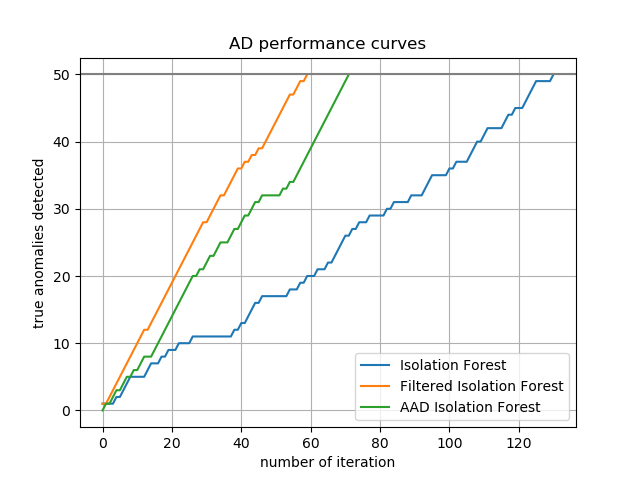

In [7]:
plt.figure()
plt.title('AD performance curves')
plt.plot(np.cumsum(isoforest_exp.data_labels[isoforest_exp.trajectory] == -1), label='Isolation Forest')
plt.plot(np.cumsum(pineforest_exp.data_labels[pineforest_exp.trajectory] == -1), label='Filtered Isolation Forest')
plt.plot(np.cumsum(aadforest_exp.data_labels[aadforest_exp.trajectory] == -1), label='AAD Isolation Forest')
plt.axhline(sum(dataset.labels == -1), color='grey')
plt.xlabel('number of iteration')
plt.ylabel('true anomalies detected')
plt.grid()
plt.legend()
pass